In [1]:
using constants
using types
using Optim
using PyPlot
using data
include("DOSfunctions.jl")
include("userfunctions.jl")
include("propertyfuncs.jl")

electronicProps (generic function with 1 method)

In [1]:
1.4/6^(2/3)

0.42399480499416586

In [2]:
Eoff=0.0
Ts=collect(300.0:20.0:1300.0)
numofn=[-1.0e20]#,-1.75e20,-3.0e19,-0.9e20]#Sample 1 -3.0e19, Sample 2 -1.25e20,
#Sample 3 -1.75e20, Sample Sb 0.75% -1.03e20, #
numofnn=[1e17]
xs=[0.287]#collect(0.0:0.01:1.0)

var0=[Ts[1],xs[1]]
Eoff=2.0
Ev(var)=Eoff
Ec(var)=Ev(var)+EgSiGe(var[1],var[2]) #var[1]:T var[2]:x

effMassV(var)=-1.2*me
effMassC(var)=0.32*me#1.4/6^(2/3)*me

bandC=parBandTx(effMassC(var0),0.0,Ec(var0),[Ec],[effMassC],var0)
bandV=parBandTx(effMassV(var0),0.0,Ev(var0),[Ev],[effMassV],var0)
#bndstTx=BandStrucTx([bandV,bandC,bandC,bandC,bandC,bandC,bandC],var0)
bndstTx=BandStrucTx([bandC,bandC,bandC,bandC,bandC,bandC,bandV],var0)
#var array: var[1]: effMass , var[2]:T, var[3]:E, var[4]:x, var[5]:Ef, 
#var[6]:band, var[7]:NII var[8]:bndst var[9]:NNI
function Deftemp(array)
    return 15
end
ksi=20.0
tauAC(var)=tauAC_func(ClSiGe(var[4],var[2]),Deftemp(var[1]),var[2],var[1],var[3],var[6])#DefP(var[1])
tauII2(var)=tauII2_func(ksi*eps0,eps0,var[6],var[5],var[2],var[7],var[1],var[3],var[8])
tauNI(var)=tauNI_func(ksi*eps0,var[1],var[9])
vartau0=[bandC.effMass,Ts[1],Ec(var0),xs[1],Ec(var0),bandC,numofn[1]*1e6,bndstTx,numofnn[1]*1e6]
#vartau0=[bandC.effMass,Ts[1],1.0,xs[1],1.5,bandC,numofn[1]*1e6,bndstTx,numofnn[1]*1e6]
tauTOTTx=tau_electron_B([tauAC,tauII2,tauNI],vartau0)#tauNI,,tauII2
xmax=3.0

3.0

In [3]:
NumofnMultiBand2(bndstTx,5.0+2.0,300.0,3.0)

-2.0502790702465177e28

In [4]:
#@time Numofn2(bandC,5.0+2.0,300.0,3.0)

  0.000145 seconds (1.95 k allocations: 231.906 KB)


-3.417131783744196e27

In [5]:
#@time Numofn(bandC,5.0+2.0,300.0,3.0)

calculating Numofn band.effMass>0
 10.944172 seconds (23.14 M allocations: 771.824 MB, 6.07% gc time)


-6.597883938187539e27

In [6]:
E=collect(0.0:0.02:1.98)
Energy=Array{Float64}(length(E))
numofn_test=Array{Float64}(length(E))
for (e,ex) in enumerate(E)
    numofn_test[e]=-NumofnMultiBand2(bndstTx,ex+0.0,300.0,3.0)
end
semilogy(E,numofn_test*1e-6,Linestyle="-",Linewidth="2",color="b")
grid()

LoadError: LoadError: PyError (:PyObject_Call) <class 'ValueError'>
ValueError('Data has no positive values, and therefore can not be log-scaled.',)
  File "/home/abdullah/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py", line 3285, in semilogy
    ret = ax.semilogy(*args, **kwargs)
  File "/home/abdullah/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py", line 1668, in semilogy
    l = self.plot(*args, **kwargs)
  File "/home/abdullah/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py", line 1812, in inner
    return func(ax, *args, **kwargs)
  File "/home/abdullah/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py", line 1428, in plot
    self.autoscale_view(scalex=scalex, scaley=scaley)
  File "/home/abdullah/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_base.py", line 2197, in autoscale_view
    y0, y1 = ylocator.view_limits(y0, y1)
  File "/home/abdullah/anaconda3/lib/python3.5/site-packages/matplotlib/ticker.py", line 1613, in view_limits
    "Data has no positive values, and therefore can not be "

while loading In[6], in expression starting on line 7

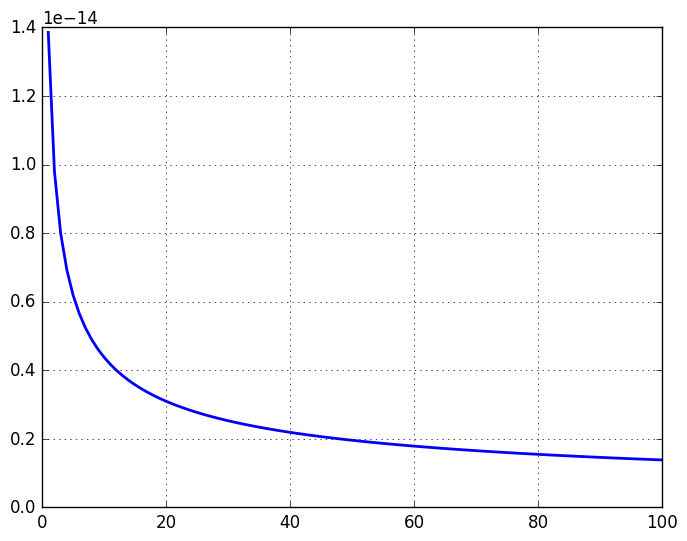

In [7]:
E=collect(1.0:1.0:100)
Energy=Array{Float64}(length(E))
tauAC_test=Array{Float64}(length(E))
for (e,ex) in enumerate(E)
    vartau_test=[bandC.effMass,300.01,ex+Ec([300.01,0.287]),0.287,0.0,bandC,numofn[1]*1e6,bndstTx,numofnn[1]*1e6]
    #vartau_test=[bandV.effMass,300.01,ex+Ec([300.01,0.287]),0.287,0.0,bandV,numofn[1]*1e6,bndstTx,numofnn[1]*1e6]
    #Energy[e]=EgSiGe(300.0,0.287)#Ec(vartau_test)
    tauAC_test[e]=tauAC(vartau_test)
end
plot(E,tauAC_test,Linestyle="-",Linewidth="2",color="b")
grid()

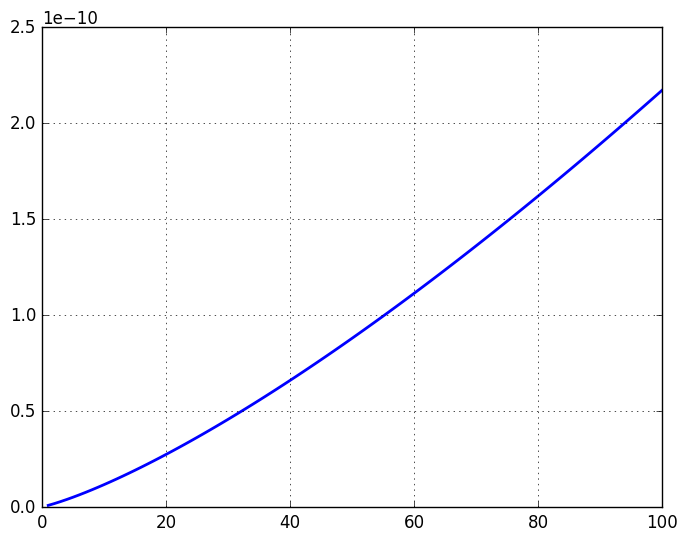

In [8]:
E=collect(1.0:1.0:100)
Energy=Array{Float64}(length(E))
tauII2_test=Array{Float64}(length(E))
for (e,ex) in enumerate(E)
    vartau_test=[bandC.effMass,300.01,ex+Ec([300.01,0.287]),0.287,0.0,bandC,numofn[1]*1e6,bndstTx,numofnn[1]*1e6]
    #vartau_test=[bandV.effMass,300.01,ex+Ec([300.01,0.287]),0.287,0.0,bandV,numofn[1]*1e6,bndstTx,numofnn[1]*1e6]
    #Energy[e]=EgSiGe(300.0,0.287)#Ec(vartau_test)
    tauII2_test[e]=tauII2(vartau_test)
end
plot(E,tauII2_test,Linestyle="-",Linewidth="2",color="b")
grid()

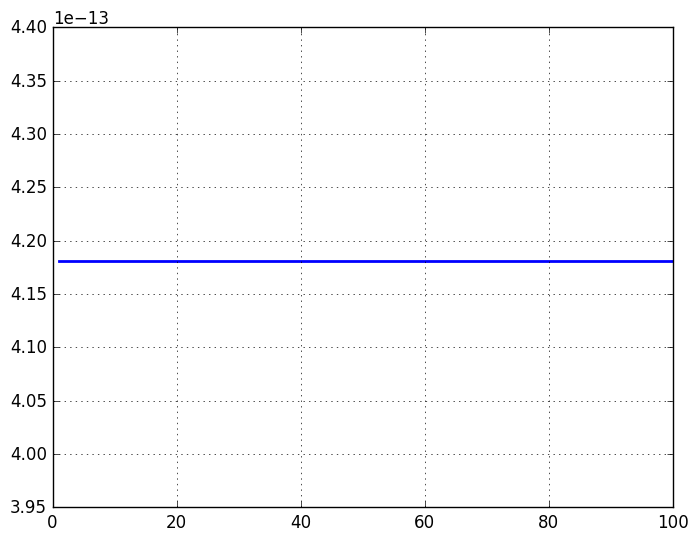

In [9]:
tauNI2_test=Array{Float64}(length(E))
for (e,ex) in enumerate(E)
    vartau_test=[bandC.effMass,300.01,ex+Ec([300.01,0.287]),0.287,0.0,bandC,numofn[1]*1e6,bndstTx,numofnn[1]*1e6]
    #vartau_test=[bandV.effMass,300.01,ex+Ec([300.01,0.287]),0.287,0.0,bandV,numofn[1]*1e6,bndstTx,numofnn[1]*1e6]
    #Energy[e]=EgSiGe(300.0,0.287)#Ec(vartau_test)
    tauNI2_test[e]=tauNI(vartau_test)
end
plot(E,tauNI2_test,Linestyle="-",Linewidth="2",color="b")
grid()

In [10]:
@time (Efs,sigmas,seebecks,kes,kees,kehs,kbis)=electronicProps(bndstTx,xs,Ts,numofn,tauTOTTx,xmax)
x=1

numberofn<-1e12
numberofn<-1e12
numberofn<-1e12
numberofn<-1e12
numberofn<-1e12
numberofn<-1e12
numberofn<-1e12
numberofn<-1e12
numberofn<-1e12
numberofn<-1e12
numberofn<-1e12
numberofn<-1e12
numberofn<-1e12
numberofn<-1e12
numberofn<-1e12
numberofn<-1e12
numberofn<-1e12
numberofn<-1e12
numberofn<-1e12
numberofn<-1e12
numberofn<-1e12
numberofn<-1e12
numberofn<-1e12
numberofn<-1e12
numberofn<-1e12
numberofn<-1e12
numberofn<-1e12
numberofn<-1e12
numberofn<-1e12
numberofn<-1e12
numberofn<-1e12
numberofn<-1e12
numberofn<-1e12
numberofn<-1e12
numberofn<-1e12
numberofn<-1e12
numberofn<-1e12
numberofn<-1e12
numberofn<-1e12
numberofn<-1e12
numberofn<-1e12
numberofn<-1e12
numberofn<-1e12
numberofn<-1e12
numberofn<-1e12
numberofn<-1e12
numberofn<-1e12
numberofn<-1e12
numberofn<-1e12
numberofn<-1e12
numberofn<-1e12
 14.933434 seconds (171.81 M allocations: 23.451 GB, 12.84% gc time)


1

In [15]:
Tsx=collect(50.01:10.0:800.01)
sigma_test=Array{Float64}(length(Tsx))
Efs=[0.0733189407889000,0.0732263573584220,0.0731163340926059,0.0729885129654301,
0.0728424436982580,0.0726775870180612,0.0724933319864562,0.0722890228338184,0.0720639889382478,0.0718175727579420,
0.0715491527022018,0.0712581598643987,0.0709440888207939,0.0706065033592432,0.0702450382275367,0.0698593979654683,
0.0694493537401763,0.0690147389218266,0.0685554439593342,0.0680714109623214,0.0675626282735758,0.0670291252160018,
0.0664709671357913,0.0658882508053257,0.0652811002155316,0.0646496627654674,0.0639941058385393,0.0633146137458142,
0.0626113850115072,0.0618846299723807,0.0611345686627117,0.0603614289566359,0.0595654449411277,0.0587468554946363,
0.0579059030484026,0.0570428325095479,0.0561578903270667,0.0552513236838078,0.0543233797993450,0.0533743053303189,
0.0524043458563574,0.0514137454410597,0.0504027462587654,0.0493715882789307,0.0483205090009171,0.0472497432328649,
0.0461595229090946,0.0450500769411601,0.0439216310982782,0.0427744079133926,0.0416086266115997,0.0404245030580859,
0.0392222497230940,0.0380020756617726,0.0367641865070633,0.0355087844740477,0.0342360683744295,0.0329462336400506,
0.0316394723545584,0.0303159732925370,0.0289759219656106,0.0276195006752098,0.0262468885718736,0.0248582617211377,
0.0234537931762366,0.0220336530580264,0.0205980086427171,0.0191470244581845,0.0176808623898216,0.0161996817970817,
0.0147036396420611,0.0131928906316736,0.0116675873751738,0.0101278805590002,0.00857391914112492,0.00700585056731582]
for (Tx,Txx) in enumerate(Tsx)
    #vartau_test=[bandC.effMass,300.01,ex+Ec([300.01,0.287]),0.287,0.0,bandC,numofn[1]*1e6,bndstTx,numofnn[1]*1e6]
    #vartau_test=[bandV.effMass,300.01,ex+Ec([300.01,0.287]),0.287,0.0,bandV,numofn[1]*1e6,bndstTx,numofnn[1]*1e6]
    #Energy[e]=EgSiGe(300.0,0.287)#Ec(vartau_test)
    #tauNI2_test[e]=tauNI(vartau_test)
    sigma_test[Tx]=sigma(tauTOTTx,bandC,Efs[Tx],Txx)*6/6^(2.0/3.0)#/(8*pi*e*e*(2meff)^1.5)
end
#plot(Tsx,sigma_test,Linestyle="-",Linewidth="2",color="b")
#grid()
#sigma(tauTOTTx,band,Efs[i,j,k],Tx)

In [17]:
SiGe_Vin_162_Bulk_EC_T=[304.367,321.834,343.668,365.502,385.153,404.803,426.638,450.655,470.306,494.323,513.974,
535.808,551.092,568.559,579.476,599.127,620.961,640.611,658.079,679.913,699.563,719.214,741.048,760.699,782.533,
802.183,821.834,843.668,863.319,885.153,904.803,926.638,946.288,965.939,987.773,1007.42,1027.07,1046.72,1075.11,
1094.76,1114.41,1149.34,1171.18,1190.83,1210.48,1232.31,1254.15]
SiGe_Vin_162_Bulk_EC_E=[121943.783915615,132463.665216631,128860.001340144,122140.388162154,119063.352419189,
113297.757837372,108070.254310922,105664.795343141,98940.3488636701,96919.886022214,91232.5517744731,
87811.7316473481,93134.1504302798,87866.513193157,84672.5711672961,80299.3559991649,77637.3404552654,
76382.5236785823,71676.8806221553,69548.7675958382,66570.3615436335,64728.6896971345,62988.1582262535,
61336.8990517315,59010.2795907047,56852.0992637653,55503.4439886995,53591.7168642415,51805.6872283439,
50684.7509858184,49084.3317904492,47583.2468904348,46634.8306222952,45276.5263848958,44847.8760045924,
45294.9835805685,45303.6020894021,46681.8538297793,49173.153425156,50250.2462262065,50812.2335533503,
52561.5890419599,53795.2552584862,54439.8412534229,55100.0617120691,55777.7368741041,56472.6079615083]
SiGe_Vin_162_Bulk_SC_T=[318.66,446.9,505.1,582,1039,1113,1190]
SiGe_Vin_162_Bulk_SC_S=[105.96,146.7,157.6,175.6,278.9,279.8,262.7]
#plot(SiGe_Vin_162_Bulk_EC_T,SiGe_Vin_162_Bulk_EC_E, linestyle="None",marker=".",markersize=20,color="r")

7-element Array{Float64,1}:
 105.96
 146.7 
 157.6 
 175.6 
 278.9 
 279.8 
 262.7 

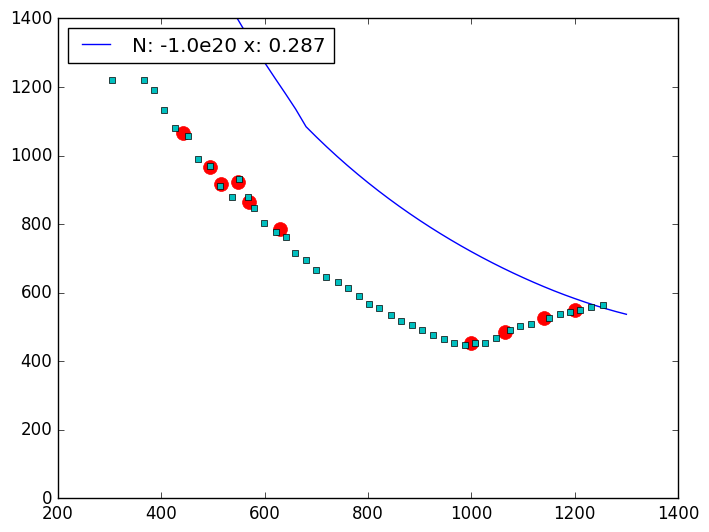

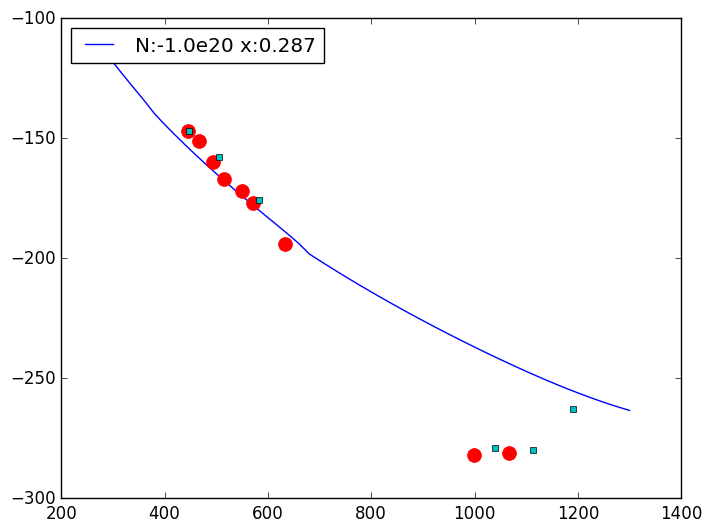

PyObject <matplotlib.legend.Legend object at 0x7fb11992a588>

In [18]:
colors=["b","g","r","c","m","y","k"]
PS_Sn06_0PAEC=[10.0,13.0,17.0,25.0
    ,30.0,46.0,88.0,108.0,232.0]
PS_Sn06_0PASC=[327.0,241.0,105.0,98.0,74.0,62.0
    ,42.0,35.0,15.0]
PS_Sn06_0PAEC_1=[85.0,80.0,70.0,72.0
    ,98.0,109.0,131.0,172.0,229.0]
PS_Sn06_0PASC_1=[348.0,385.0,406.0,371.0,352.0,338.0
    ,301.0,277.0,271.0]
SY_16B_Sigma_Temp=[334,442,494,515,548,569,630,999,1066,1140,1200]
SY_16B_Sigma=[129449.8,106450.9,96730.51,91575.09,92208.39,86415.49,78529.92,
45374.11,
48600.31,
52723.15,
55069.11]
SY_16B_Seebeck=[-107,-111,-147,-151,-160,-167,-172,-177,-194,-282,-281]
SY_16B_Seebeck_Temp=[323,335,445,467,494,515,550,571,633,999,1067]
plots=Array{Any}(length(numofn)*length(xs))
figure()
k=1
for p in 1:1:length(numofn)
    for q in 1:1:length(xs)                
        plot(Ts,sigmas[:,p,q]/100,linestyle="-",color=colors[mod(k,length(colors))]
        ,label=string("N: $(numofn[p]) x: $(xs[q])"))
        #push!(plots,p)
        k+=1
    end
end
plot(SY_16B_Sigma_Temp,SY_16B_Sigma/100, linestyle="None",marker=".",markersize=20,color="r")
plot(SiGe_Vin_162_Bulk_EC_T,SiGe_Vin_162_Bulk_EC_E/100, linestyle="None",marker="s",markersize=4,color="c")
#plot(Tdata.+273.15,PS_Sn06_0PAEC, linestyle="None",marker=".",markersize=20,color="r")
#plot(Tdata.+273.15,PS_Sn06_0PAEC_1, linestyle="None",marker=".",markersize=20,color="g")
ylim(0,1400)
legend(loc="upper left")
figure()
k=1
for p in 1:1:length(numofn)
    for q in 1:1:length(xs)
        plot(Ts,1e6*seebecks[:,p,q],color=colors[mod(k,length(colors))]
        ,label=string("N:$(numofn[p]) x:$(xs[q])")) 
        k+=1
    end
end
plot(SY_16B_Seebeck_Temp,SY_16B_Seebeck, linestyle="None",marker=".",markersize=20,color="r")
plot(SiGe_Vin_162_Bulk_SC_T,-SiGe_Vin_162_Bulk_SC_S, linestyle="None",marker="s",markersize=4,color="c")
#plot(Tdata+273.15,-PS_Sn06_0PASC, linestyle="None",marker=".",markersize=20,color="r")
#plot(Tdata+273.15,-PS_Sn06_0PASC_1, linestyle="None",marker=".",markersize=20,color="g")
#ylim(90,260)
legend(loc="upper left")

In [19]:
#vartauPhLSi=[0.3,2.0024e-29,x]
#var[1]: gamma, var[2]:V, var[3]:x, var[4]:T, var[5]:T, 
#var[6]: M, var[7]:v, var[8]:theta, var[9]:MI, var[10]:MII, 
#var[11]:alpha, var[12]:Nc, var[13]:Dc, var[14]:Eep, 
#var[15]:md, var[16]:ro, var[17]:Ef
#vartauPhT=[]

  likely near /home/abdullah/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/abdullah/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/abdullah/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/abdullah/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/abdullah/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/abdullah/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/abdullah/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/abdullah/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/abdullah/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/abdullah/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/abdullah/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/abdullah/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /home/abdullah/.julia/v0.5/IJulia/src/kernel.jl:31
in show at /home/abdullah/.julia/v0.5/PyCall/src/PyCall.jl
  likely near /home/abdullah/.julia/v0.5/IJulia/src/kernel.jl:31
in show at /home/abdullah/.juli